<a href="https://colab.research.google.com/github/sriha03/Face-Recognition/blob/main/Copy_of_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.3 MB/s eta 0:00:00


In [3]:
import cv2 as cv
import os
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np

In [4]:
img = cv.imread("/content/drive/MyDrive/dataset/Nirmala/nirmala.jpg")
#opencv BGR channel format, and plt reads images as RBG channel format

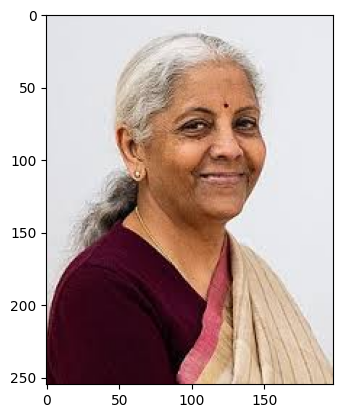

In [5]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
from mtcnn.mtcnn import MTCNN

In [7]:
detector = MTCNN()
results = detector.detect_faces(img)

if results:
    print("Faces detected:")
    print(results)
else:
    print("No faces detected in the image.")

Faces detected:
[{'box': [75, 34, 72, 108], 'confidence': np.float64(0.9996057152748108), 'keypoints': {'nose': [np.int64(129), np.int64(96)], 'mouth_right': [np.int64(137), np.int64(110)], 'right_eye': [np.int64(136), np.int64(75)], 'left_eye': [np.int64(102), np.int64(77)], 'mouth_left': [np.int64(104), np.int64(113)]}}]


In [8]:
!pip install lz4

In [9]:
x,y,w,h=results[0]['box']


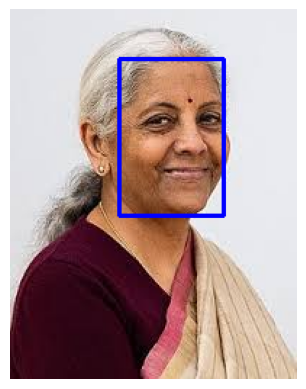

In [10]:
# Create a copy of the image to draw the rectangle on
img_with_box = img.copy()

# Draw the rectangle on the copied image
cv.rectangle(img_with_box, (x, y), (x+w, y+h), (0, 0, 255), 2)

# Display the image with the rectangle
plt.imshow(img_with_box)
plt.axis('off') # Optional: turn off axes for cleaner display
plt.show()

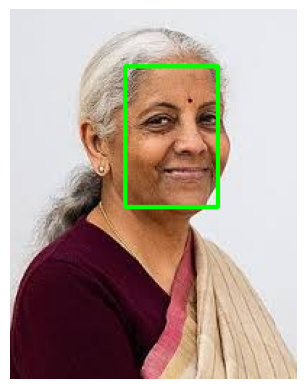

In [11]:
# Get the original bounding box coordinates
x, y, w, h = results[0]['box']

# Define a scaling factor (e.g., 0.9 to shrink by 10%)
scale_factor = 0.9

# Calculate new width and height
new_w = int(w * scale_factor)
new_h = int(h * scale_factor)

# Calculate the difference in width and height
delta_w = w - new_w
delta_h = h - new_h

# Adjust x and y coordinates to keep the box centered
new_x = x + delta_w // 2
new_y = y + delta_h // 2

# Ensure coordinates are within image bounds (optional but recommended)
new_x = max(0, new_x)
new_y = max(0, new_y)
# Make sure the bottom-right corner is also within bounds
new_w = min(new_w, img.shape[1] - new_x)
new_h = min(new_h, img.shape[0] - new_y)


# Create a copy of the image to draw the rectangle on
img_with_adjusted_box = img.copy()

# Draw the adjusted rectangle on the copied image
cv.rectangle(img_with_adjusted_box, (new_x, new_y), (new_x + new_w, new_y + new_h), (0, 255, 0), 2) # Using green color for the adjusted box

# Display the image with the adjusted rectangle
plt.imshow(img_with_adjusted_box)
plt.axis('off') # Optional: turn off axes for cleaner display
plt.show()

In [12]:
print(f"x: {x}, y: {y}, w: {w}, h: {h}")

x: 75, y: 34, w: 72, h: 108


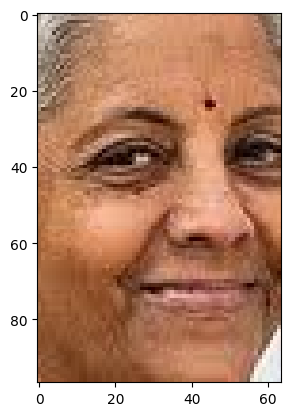

In [13]:
# Crop the image using the adjusted bounding box coordinates
cropped_face = img[new_y : new_y + new_h, new_x : new_x + new_w]

# Display the cropped face
plt.imshow(cropped_face)
#plt.axis('off') # Optional: turn off axes for cleaner display
#plt.title('Cropped Face')
#plt.show()

array([[[157, 149, 138],
        [162, 154, 144],
        [183, 175, 166],
        ...,
        [171, 164, 146],
        [182, 177, 158],
        [185, 180, 161]],

       [[164, 156, 145],
        [168, 160, 150],
        [187, 179, 170],
        ...,
        [166, 159, 141],
        [173, 166, 148],
        [174, 168, 150]],

       [[173, 165, 154],
        [177, 169, 158],
        [194, 185, 176],
        ...,
        [160, 151, 133],
        [159, 152, 134],
        [159, 152, 134]],

       ...,

       [[157,  97,  64],
        [154,  95,  61],
        [143,  84,  50],
        ...,
        [229, 233, 239],
        [231, 235, 241],
        [232, 235, 242]],

       [[170, 111,  77],
        [167, 107,  74],
        [153,  94,  60],
        ...,
        [227, 231, 236],
        [226, 229, 236],
        [226, 229, 236]],

       [[180, 120,  86],
        [176, 116,  82],
        [160, 100,  66],
        ...,
        [225, 229, 234],
        [223, 226, 232],
        [222, 225, 232]]], dtype=uint8)
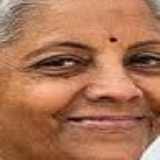

In [14]:
cv.resize(cropped_face,(160,160))
#facenet takes input as 160x160

Automate the preprocessing

In [33]:
'''
class FACELOADING:
  def __init__(self,directory):
    self.directory=directory
    self.target_size = (160,160)
    self.X=[]
    self.Y=[]
    self.detector = MTCNN() # Initialize the detector here

  def extract_face(self,filename):
    img=cv.imread(filename)
    img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    # Add a check if faces are detected before accessing results
    results = self.detector.detect_faces(img)
    if not results:
        print(f"No face detected in {filename}, skipping.")
        return None # Return None if no face is detected
    x,y,w,h=results[0]['box']
    x,y=abs(x),abs(y)
    # Ensure coordinates are within image bounds
    x = max(0, x)
    y = max(0, y)
    w = min(w, img.shape[1] - x)
    h = min(h, img.shape[0] - y)

    face=img[y:y+h,x:x+w]
    face_arr=cv.resize(face,self.target_size)
    return face_arr


  def load_faces(self,dir):
    FACES=[]
    for im_name in os.listdir(dir):
      try:
        path= dir +im_name
        single_face= self.extract_face(path)
        if single_face is not None: # Only append if a face was detected and extracted
          FACES.append(single_face)
      except Exception as e:
        print(f"Error processing {im_name}: {e}") # Print the error for debugging
        pass
    return FACES

  def load_classes(self):
    for sub_dir in os.listdir(self.directory):
      path=self.directory + '/' + sub_dir +'/'
      # Check if the path is a directory before listing its contents
      if os.path.isdir(path):
          FACES = self.load_faces(path)
          labels = [sub_dir for _ in range(len(FACES))]
          print(f"loaded successfully : {len(labels)} faces from {sub_dir}") # More informative print
          self.X.extend(FACES)
          self.Y.extend(labels)
      else:
          print(f"Skipping {path} as it is not a directory.") # Inform user about skipped files

    return np.asarray(self.X), np.asarray(self.Y)


  def plot_images(self):
    plt.figure(figsize=(10, 10)) # Optional: Adjust figure size
    for num, image in enumerate(self.X):
        plt.subplot(3, 3, num + 1)
        plt.imshow(image)
        plt.title(self.Y[num]) # Add title with label
        plt.axis('off')
    plt.show()

 '''

'\nclass FACELOADING:\n  def __init__(self,directory):\n    self.directory=directory\n    self.target_size = (160,160)\n    self.X=[]\n    self.Y=[]\n    self.detector = MTCNN() # Initialize the detector here\n\n  def extract_face(self,filename):\n    img=cv.imread(filename)\n    img=cv.cvtColor(img,cv.COLOR_BGR2RGB)\n    # Add a check if faces are detected before accessing results\n    results = self.detector.detect_faces(img)\n    if not results:\n        print(f"No face detected in {filename}, skipping.")\n        return None # Return None if no face is detected\n    x,y,w,h=results[0][\'box\']\n    x,y=abs(x),abs(y)\n    # Ensure coordinates are within image bounds\n    x = max(0, x)\n    y = max(0, y)\n    w = min(w, img.shape[1] - x)\n    h = min(h, img.shape[0] - y)\n\n    face=img[y:y+h,x:x+w]\n    face_arr=cv.resize(face,self.target_size)\n    return face_arr\n\n\n  def load_faces(self,dir):\n    FACES=[]\n    for im_name in os.listdir(dir):\n      try:\n        path= dir +im_

In [28]:
#sardor
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()


    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr


    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [29]:
#sardor
faceloading = FACELOADING("/content/drive/MyDrive/dataset")
X, Y = faceloading.load_classes()

Loaded successfully: 5
Loaded successfully: 6
Loaded successfully: 5
Loaded successfully: 6


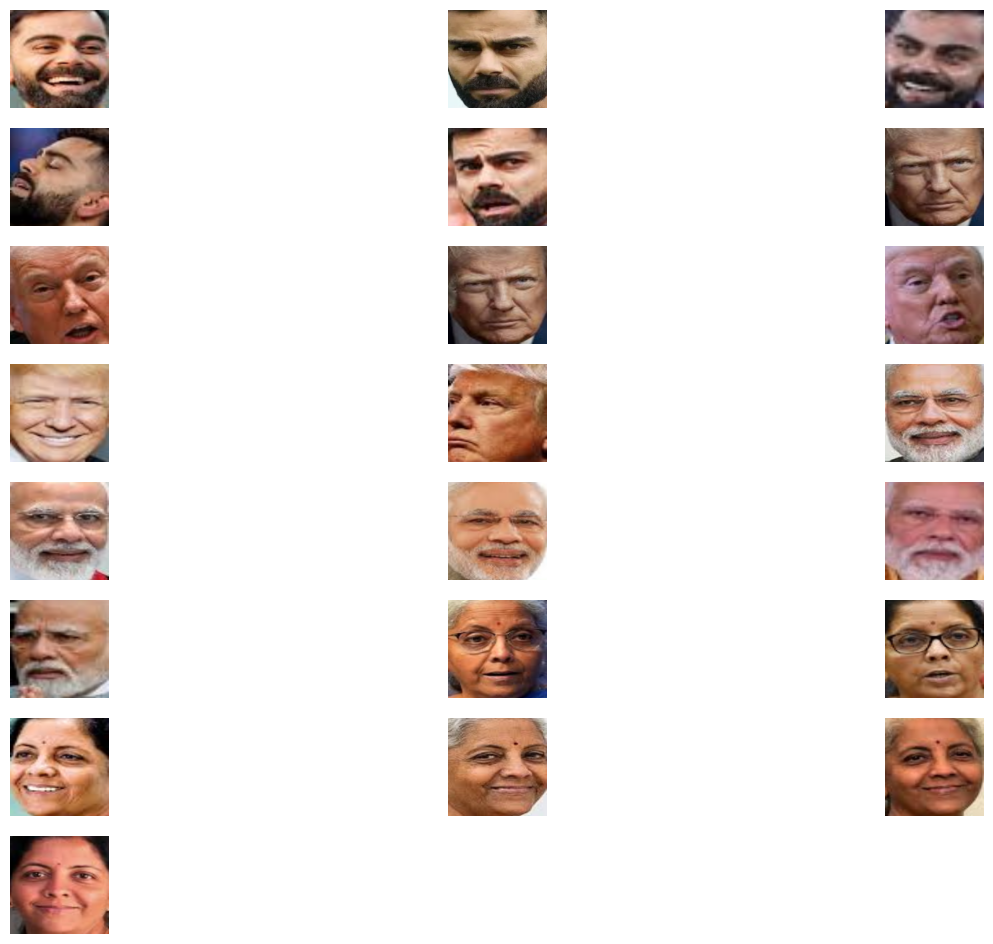

In [30]:
#sardor
plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

In [34]:
'''
faceloading=FACELOADING("/content/drive/MyDrive/dataset")
X,Y=faceloading.load_classes()
'''

' faceloading=FACELOADING("/content/drive/MyDrive/dataset")\nX,Y=faceloading.load_classes()\n'

In [35]:
'''
faceloading.plot_images()
'''

' \nfaceloading.plot_images()\n'

In [37]:
'''
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for num,image in enumerate(X):
  ncols=3
  nrows=len(Y)
  plt.subplot(nrows,ncols,num+1)
  plt.imshow(image)
  plt.axis('off')

'''

"\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(10, 10))\nfor num,image in enumerate(X):\n  ncols=3\n  nrows=len(Y)\n  plt.subplot(nrows,ncols,num+1)\n  plt.imshow(image)\n  plt.axis('off')\n\n"

Facenet

In [38]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=723d35bae38276b1592d099297b9474801bdbca8c6dbadfcc3fbaf48020dde09
  Stored in directory: /root/.cache/pip/wheels/05/b0/f5/19ac49fedc10b1df3ee56b096edbcfa39d45794fccc6bcdbbf
Successfully built keras-facenet


In [39]:
from keras_facenet import FaceNet